In [ ]:
from numpy import array
from numpy import hstack
from numpy import mean
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
import os
import datetime

In [ ]:
!mkdir data
!cd data && mv /content/Archive.zip  /content/data/
!cd data && unzip Archive.zip && mv /content/data/Archive.zip /content/

Archive:  Archive.zip
   creating: 01_January/
  inflating: 01_January/0100.csv     
  inflating: 01_January/0110.csv     
  inflating: 01_January/0120.csv     
  inflating: 01_January/0130.csv     
  inflating: 01_January/0140.csv     
  inflating: 01_January/0150.csv     
  inflating: 01_January/0200.csv     
  inflating: 01_January/0210.csv     
  inflating: 01_January/0220.csv     
  inflating: 01_January/0230.csv     
  inflating: 01_January/0240.csv     
  inflating: 01_January/0250.csv     
  inflating: 01_January/0300.csv     
  inflating: 01_January/0310.csv     
  inflating: 01_January/0320.csv     
  inflating: 01_January/0330.csv     
  inflating: 01_January/0340.csv     
  inflating: 01_January/0350.csv     
  inflating: 01_January/0400.csv     
  inflating: 01_January/0410.csv     
  inflating: 01_January/0420.csv     
  inflating: 01_January/0430.csv     
  inflating: 01_January/0440.csv     
  inflating: 01_January/0450.csv     
   creating: 02_February/
  inflating: 02

In [ ]:
!cd data && ls

01_January   03_March  05_May	07_July    09_September  11_November
02_February  04_April  06_June	08_August  10_October	 12_December


In [ ]:
# def calculate_cyclical_representation(datetime_str):
#     dt_object = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
#     day_of_year = dt_object.timetuple().tm_yday
#     sin_component = np.sin(2 * np.pi * day_of_year / 365)
#     cos_component = np.cos(2 * np.pi * day_of_year / 365)
#     return [sin_component, cos_component]


In [ ]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

# Function to read a CSV file and convert it to the required format
def process_csv(file_path):
  df = pd.read_csv(f"{file_path}.csv")
  # Assuming your CSV structure is Time, Overcast_percent, Cloudy_percent, Clear_percent
  data = df[['date_time', 'percent_overcast', 'percent_cloudy', 'percent_clear']].values
  return data

# Function to calculate cyclical representation of the date
def calculate_cyclical_representation(datetime_str):
  dt_object = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
  month_of_year = dt_object.timetuple().tm_mon
  return month_of_year

def create_sequences(data_path, sequence_length=3):
    X = []
    y = []
    arr = [[],[],[],[]]
    # Iterate through each month folder
    for month_folder in sorted(os.listdir(data_path)):
        month_path = os.path.join(data_path, month_folder)


        # Iterate through each desired hourly CSV file
        for file_name in ['0100', '0200', '0300', '0400']:
            print(file_name)
            file_path = os.path.join(month_path, file_name)
            # print(file_path)
            # Process the CSV file
            sequence_data = process_csv(file_path)
            for i in range(len(sequence_data)):
              test = list(sequence_data[i])
              var1 = calculate_cyclical_representation(sequence_data[i][0])
              test.append(var1)
              arr[int(file_name[1])-1].append(test)
              # arr[int(file_name[1])-1].append()
    print(len(arr[3]))
    temparr2 = []
    temparr3 = []
    for i in range(len(arr[0])):
      temparr = []
      # temparr2.append()
      # temparr2.append(calculate_cyclical_representation(arr[1][i][0]))
      # temparr2.append(calculate_cyclical_representation(arr[2][i][0]))
      # temparr3.append(calculate_cyclical_representation(arr[3][i][0]))
      temparr.append(arr[0][i][1:])
      temparr.append(arr[1][i][1:])
      temparr.append(arr[2][i][1:])
      X.append(temparr)
      y.append(arr[3][i][1:])

    # Convert the lists to numpy arrays
    X = np.array(X)
    # X.hstack(temparr2)
    y = np.array(y)
    # y.hstack(temparr3)
    # X = [[elem[0] if isinstance(elem, list) else elem for elem in inner_list] for inner_list in X]
    print(X[0],y[0])
    return X, y



# Specify the path to your data folder
data_folder = "/content/test"
# Print the shapes of the input and output arrays
X,y = create_sequences(data_folder)

print("Input shape (X):", X.shape)
print("Output shape (y):", y.shape)



0100
0200
0300
0400
0100
0200
0300
0400
0100
0200
0300
0400
0100
0200
0300
0400
0100
0200
0300
0400
0100
0200
0300
0400
181
[[54.67128028 45.32871972  0.          1.        ]
 [92.30103806  7.69896194  0.          1.        ]
 [98.87543253  1.12456747  0.          1.        ]] [92.56055363  7.43944637  0.          1.        ]
Input shape (X): (178, 3, 4)
Output shape (y): (178, 4)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
from tensorflow.keras.optimizers import Adam
# Define your model
model = Sequential()
model.add(LSTM(80, activation='relu', return_sequences=True, input_shape=(3, X.shape[2])))
model.add(Dropout(0.2, input_shape=(3, X.shape[2])))
model.add(LSTM(100, activation='relu'))

model.add(Dense(4))  # Adjust the number of output nodes based on your target shape
custom_learning_rate = 0.00001  # Replace with your desired learning rate
optimizer = Adam(learning_rate=custom_learning_rate)

model.compile(optimizer=optimizer, loss='mse')




In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, verbose=1, batch_size = 4, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/300
27/27 [==============================] - 6s 51ms/step - loss: 1896.7933 - val_loss: 1817.7571
Epoch 2/300
27/27 [==============================] - 0s 11ms/step - loss: 1891.3057 - val_loss: 1812.5315
Epoch 3/300
27/27 [==============================] - 0s 9ms/step - loss: 1891.3197 - val_loss: 1807.4067
Epoch 4/300
27/27 [==============================] - 0s 10ms/step - loss: 1885.8181 - val_loss: 1802.0590
Epoch 5/300
27/27 [==============================] - 0s 9ms/step - loss: 1877.2627 - val_loss: 1796.4141
Epoch 6/300
27/27 [==============================] - 0s 10ms/step - loss: 1871.3976 - val_loss: 1790.5942
Epoch 7/300
27/27 [==============================] - 0s 9ms/step - loss: 1863.8208 - val_loss: 1784.5387
Epoch 8/300
27/27 [==============================] - 0s 11ms/step - loss: 1855.8978 - val_loss: 1778.3696
Epoch 9/300
27/27 [==============================] - 0s 9ms/step - loss: 1856.3993 - val_loss: 1772.0376
Epoch 10/300
27/27 [==============================

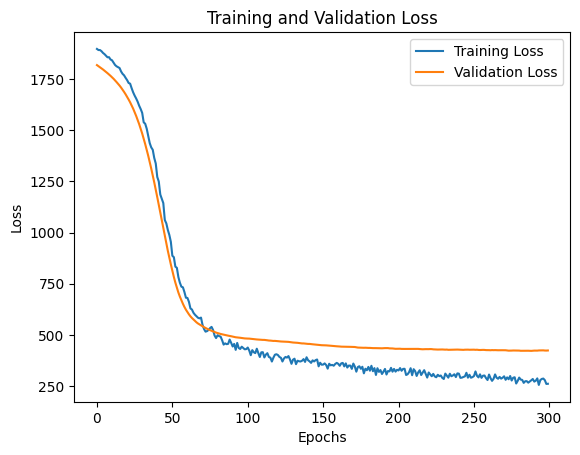

3/3 [==============================] - 0s 5ms/step


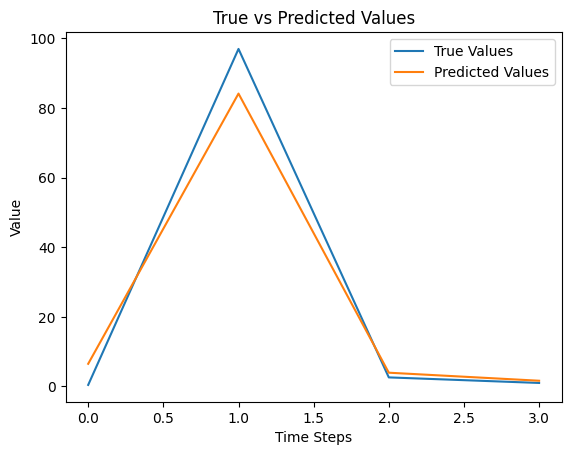

In [ ]:
import pandas as pd


# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)


# Flatten the input and output arrays if needed
X_test_flatten = X_test.flatten()
predictions_flatten = predictions.flatten()

# Create a DataFrame
data = {'Input': X_test_flatten}
df = pd.DataFrame(data)

data2 = {'Output': predictions_flatten}
df2 = pd.DataFrame(data2)
# Save the DataFrame to a CSV file
df.to_csv('input.csv', index=False)
# Save the DataFrame to a CSV file
df2.to_csv('output.csv', index=False)


# Plot a sample sequence and its predicted values
sample_idx = 0  # Change this to visualize different samples
plt.plot(y_test[sample_idx], label='True Values')
plt.plot(predictions[sample_idx], label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
model.save('LSTM10_final_v1.h5')



In [ ]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model('LSTM10_final_v1.h5')
datetime_str = '2018-01-02 01:00:00'
A= calculate_cyclical_representation(datetime_str)
x_input = array([[54.67128027681661,45.32871972318339,0.0,A], [92.30103806228374,7.698961937716263,0.0,A], [98.87543252595155,1.1245674740484428,0.0,A]])
x_input = x_input.reshape((1, 3, 4))
yhat = loaded_model.predict(x_input, verbose=0)
print(yhat)

[[80.480675  13.750294   1.1557294  4.946191 ]]


5/5 [==============================] - 0s 5ms/step


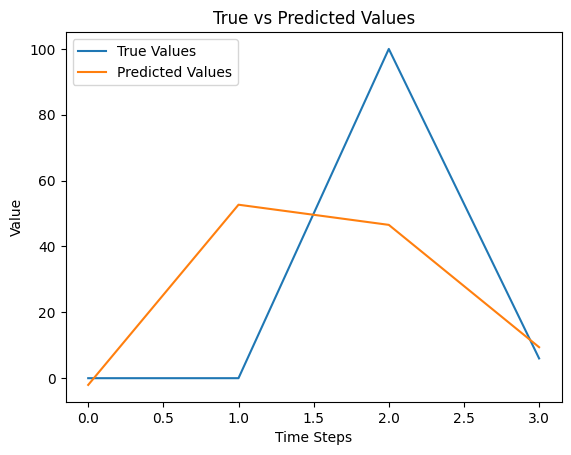

In [ ]:
predictions = loaded_model.predict(X_test)


sample_idx = 0  # Change this to visualize different samples
plt.plot(y_test[sample_idx], label='True Values')
plt.plot(predictions[sample_idx], label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()